# Trending YouTube Video Statistics

YouTube (słynna na całym świecie witryna do udostępniania filmów) prowadzi listę najpopularniejszych filmów na platformie.(https://www.kaggle.com/datasnaek/youtube-new)

Celem pracy jest przewidzenie liczby "like" pod filmikiem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Czytanie zbioru danych
Następnie odczytujemy plik zestawu danych, który jest w formacie csv i poznajemy nasz zestaw danych, wyświetlając jego kilka pierwszych wierszy

In [2]:
df=pd.read_csv("Desktop/Youtube_dataset/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
print(df.shape)

(40949, 16)


In [4]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Zmieniamy format daty ("trending_date") oraz ("publish_time").

In [5]:
df['trending_date']=pd.to_datetime(pd.Series(df['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
df['publish_time']=pd.to_datetime(pd.Series(df['publish_time'].apply(lambda x:x[:19])))
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [6]:
df['trending days_difference']=df.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1) 
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending days_difference
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,26
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,26
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,26
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,27


In [7]:
df['trending days_difference'].replace({-1:0},inplace=True)

In [8]:
print(df['trending days_difference'].max())
print(df['trending days_difference'].min())

4214
0


Dodaje osobną kolumne, obliczającą przez ile dni filmik był "trending".

In [9]:
df.dtypes

video_id                            object
trending_date               datetime64[ns]
title                               object
channel_title                       object
category_id                          int64
publish_time                datetime64[ns]
tags                                object
views                                int64
likes                                int64
dislikes                             int64
comment_count                        int64
thumbnail_link                      object
comments_disabled                     bool
ratings_disabled                      bool
video_error_or_removed                bool
description                         object
trending days_difference             int64
dtype: object

Przekonwertowaliśmy kolumny „trending_date” i „publish_time” na datetime

In [10]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description                 570
trending days_difference      0
dtype: int64

Jedyne brakujące wartości mamy w kolumnie "description".

In [11]:
df['description']=df['description'].fillna("")
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                 0
trending days_difference    0
dtype: int64

Uzupełniliśmy brakujące wartości pustym ciągiem znakowym.

### Wizualizacja danych

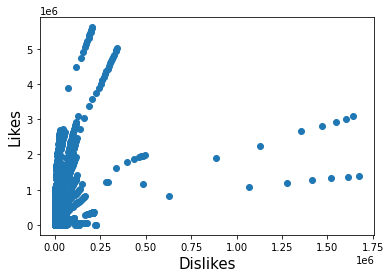

In [12]:
plt.scatter(df['dislikes'],df['likes'])
plt.xlabel("Dislikes",size=15)
plt.ylabel("Likes",size=15)
plt.show()

Przedstawiam wizualizacje liczby "likes" i liczby "views"

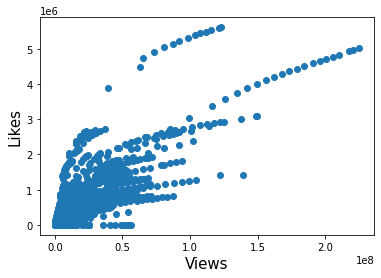

In [13]:
plt.scatter(df['views'],df['likes'])
plt.xlabel("Views",size=15)
plt.ylabel("Likes",size=15)
plt.show()

Widzimy, że "views" i "likes" są naprawdę pozytywnie skorelowane: gdy jedno się zwiększa, drugie też rośnie — przeważnie

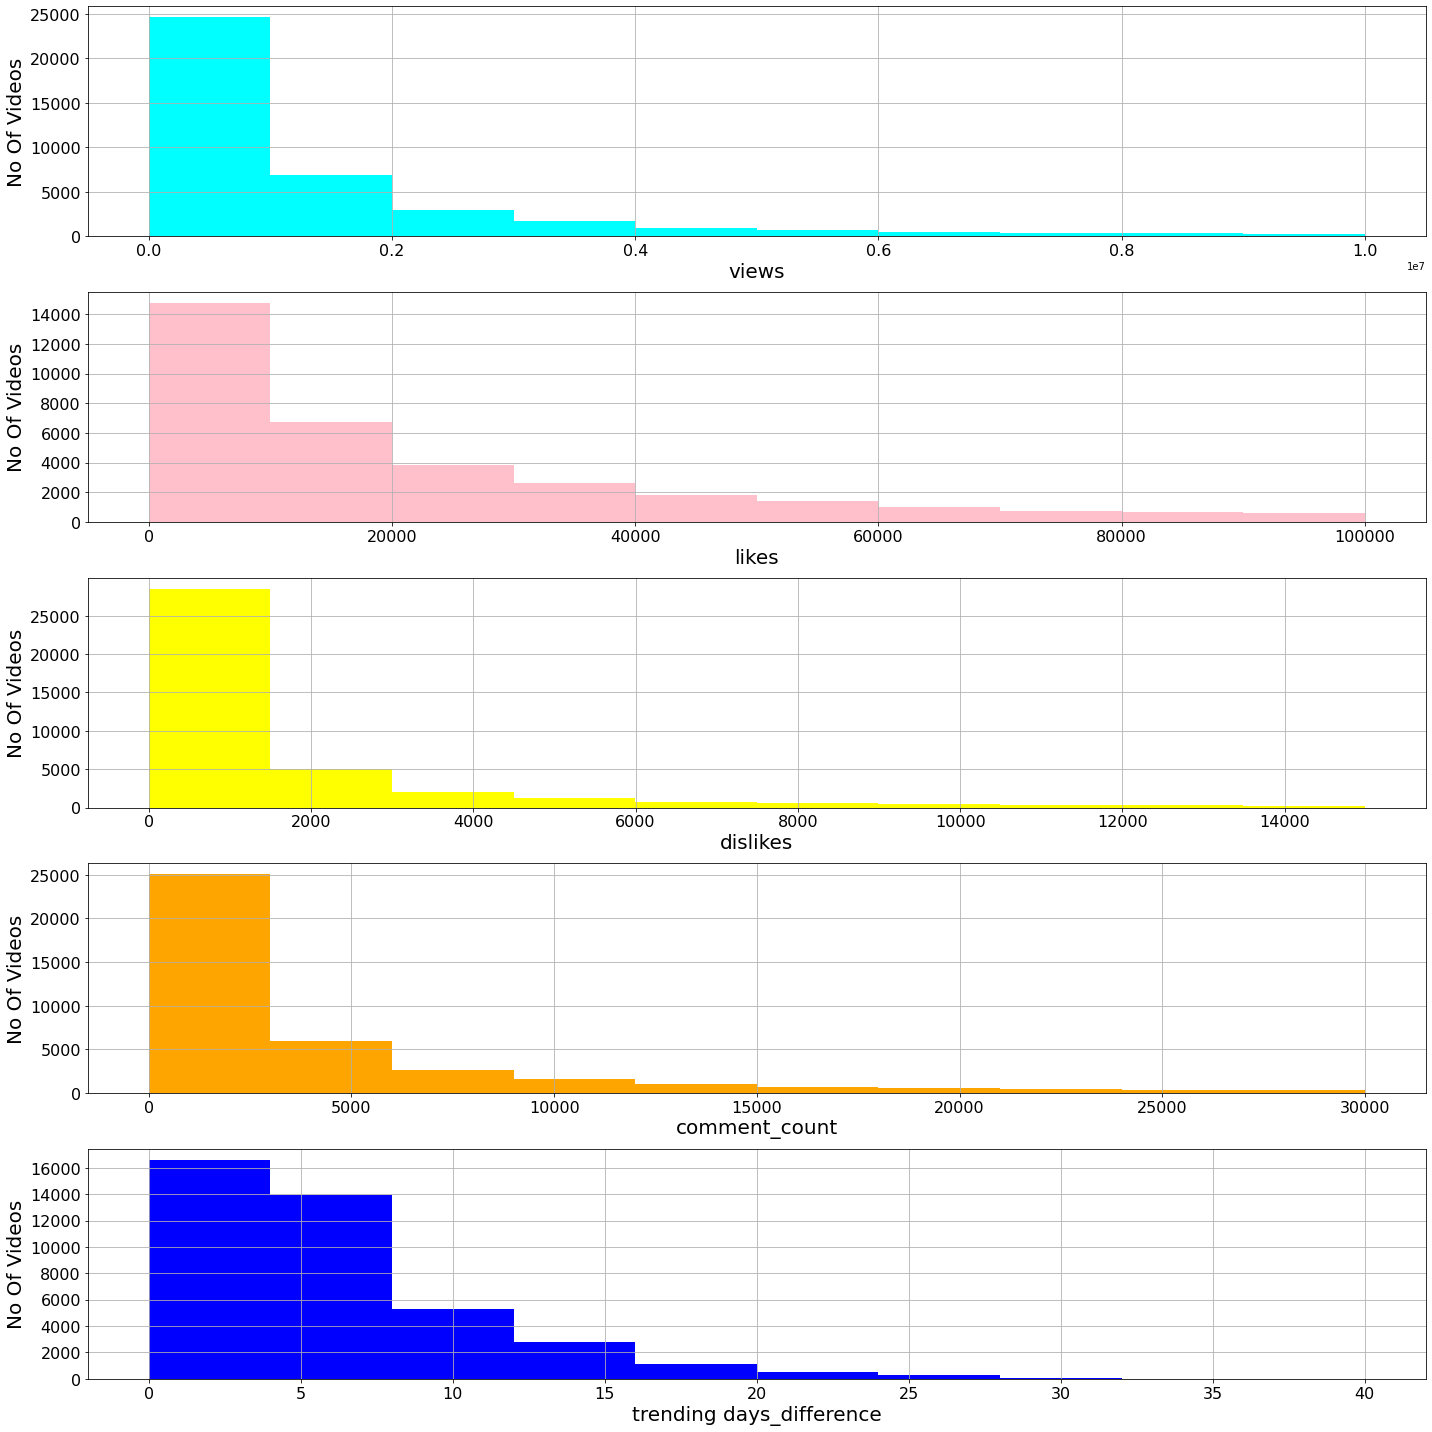

In [14]:
num_cols=['views','likes','dislikes','comment_count','trending days_difference']
color=['cyan','pink','yellow','orange','blue']
r=[10000000,100000,15000,30000,40]
fig, ax = plt.subplots(5, 1, figsize=(20, 20))
for var,i,j,subplot in zip(num_cols,r,color, ax.flatten()):
    ax=df[df[var]<=i][var].hist(ax=subplot,ylabelsize=16,xlabelsize=16,color=j)
    ax.set_xlabel(var,fontsize=20)
    ax.set_ylabel("No Of Videos",fontsize=20)
fig.tight_layout()  

Wyświetlanie zagęszczenia danych numerycznych.
Jeśli chodzi o liczbę "comment_count", "dislikes" to najczęściej filmy mają małą liczbę, a w przypadku "likes" i "views" dane są dosyć dobrze rozłożone.

In [15]:
num_cols=['views','likes','dislikes','comment_count','trending days_difference']
x=[2000000,40000,2000,5000,15]
for i,j in zip(num_cols,x):
    c=df[i].loc[df[i]<=j].count()/df[i].count()*100
    print(i,c)

views 76.9811228601431
likes 68.4900730176561
dislikes 75.49879117927178
comment_count 72.26305892695792
trending days_difference 94.40279371901634


<AxesSubplot:>

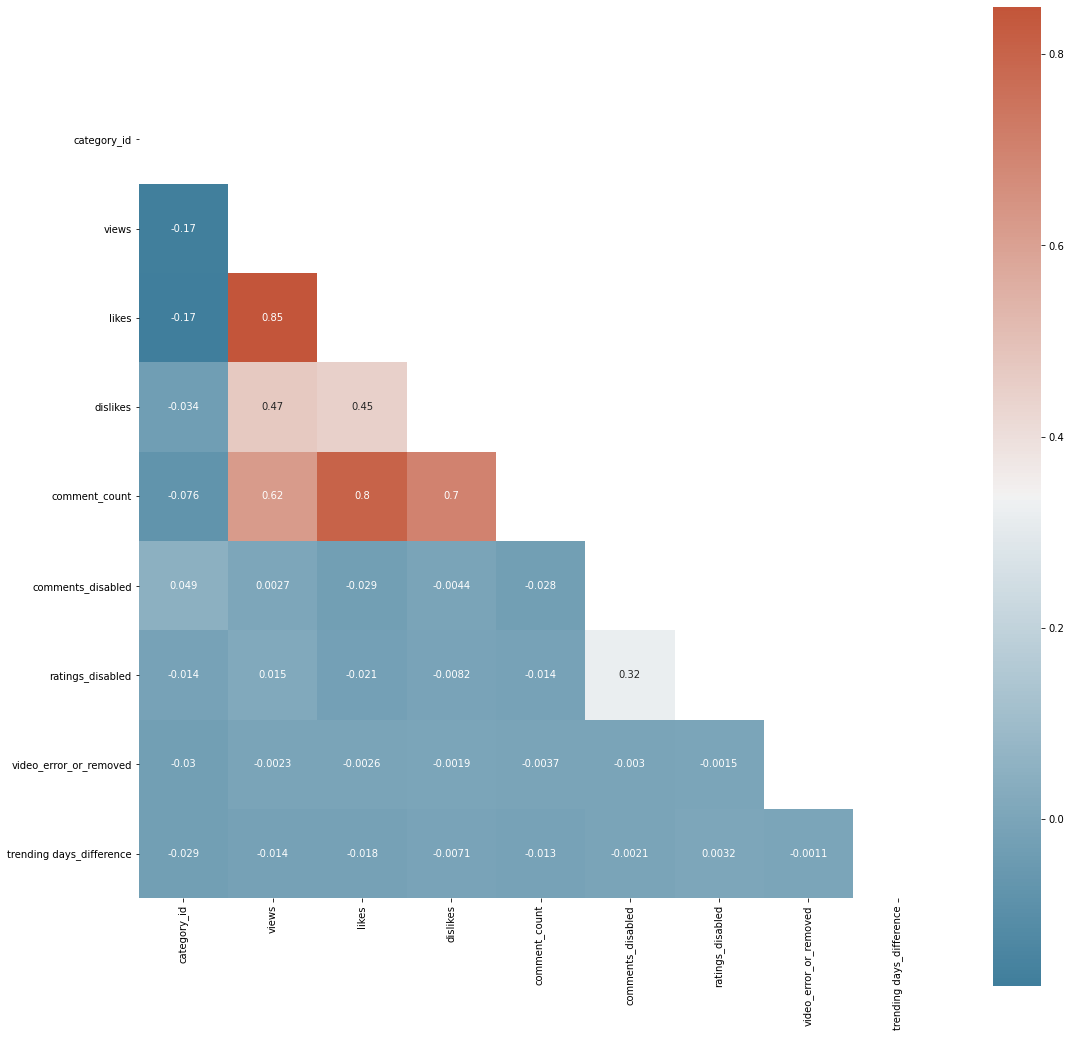

In [16]:
import seaborn as sns
corrmat = df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, mask=mask, cmap=cmap, annot=True, square=True)

Największą korelację można zauważyć pomiędzy "likes" i "dislikes" oraz pomiędzy "views" i "likes".

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


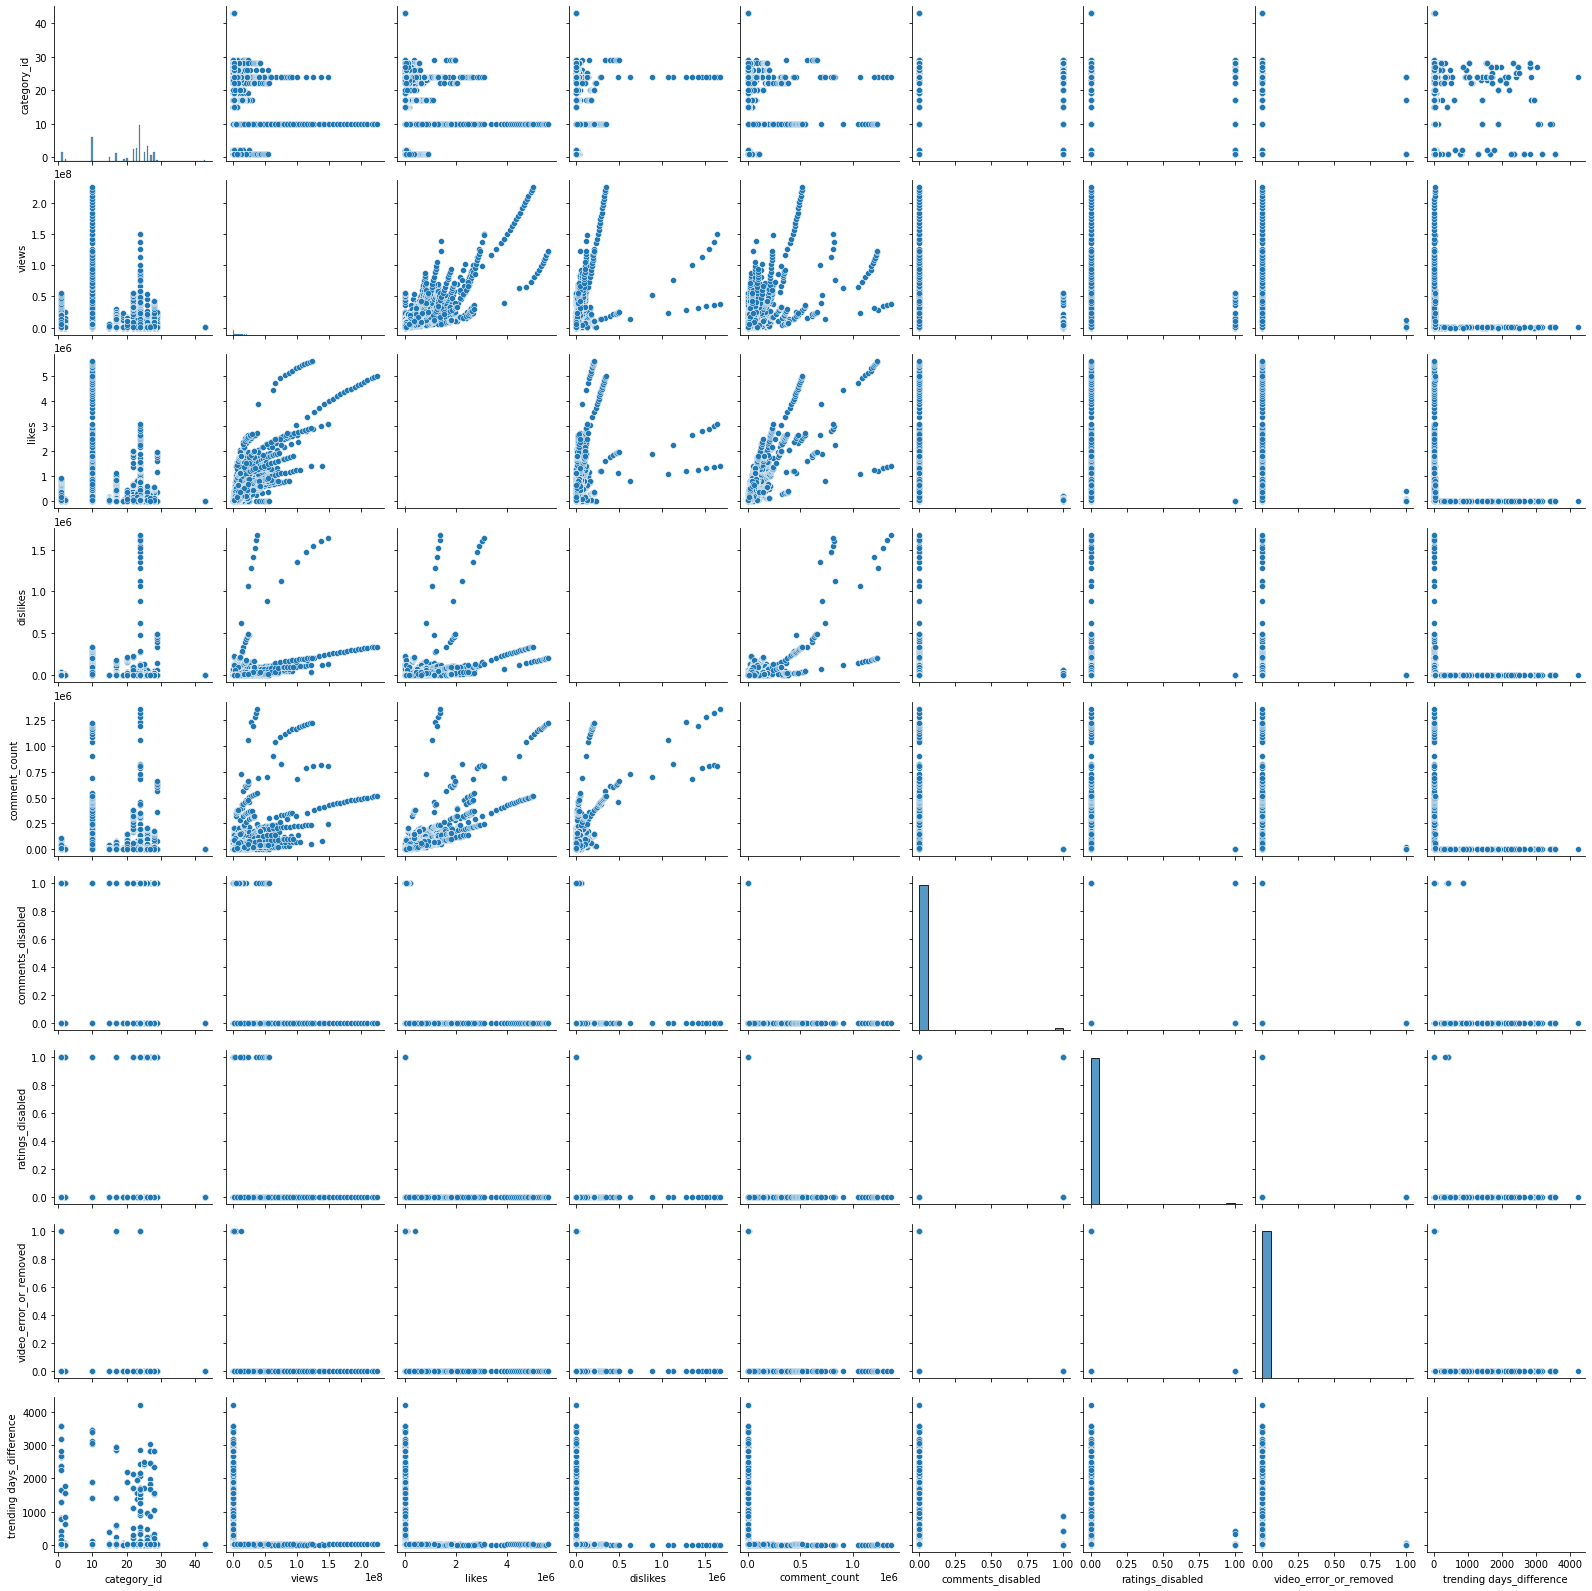

In [17]:
sns.pairplot(df)
plt.show()

Zobrazowana korelacja pomiędzy kolumnami.

### Konwertujemy kolumny kategoryczne na numeryczne.

In [18]:
df.describe(include="object")

,video_id,title,channel_title,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949
unique,6351,6455,2207,6055,6352,6902
top,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,30,203,1535,30,570


In [19]:
c=df.channel_title.value_counts()
c=c[c>50]
c

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              193
Vox                                       193
                                         ... 
Lip Sync Battle                            52
Epicurious                                 52
Jaiden Animations                          51
CBS Los Angeles                            51
Casey Holmes                               51
Name: channel_title, Length: 203, dtype: int64

Wypisane kanałe, które mają więcej niż 50 filmików.

In [20]:
df.drop(['video_id','trending_date','title','tags','thumbnail_link','description','publish_time'],axis=1,inplace=True)
df

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference
0,CaseyNeistat,22,748374,57527,2966,15954,False,False,False,0
1,LastWeekTonight,24,2418783,97185,6146,12703,False,False,False,0
2,Rudy Mancuso,23,3191434,146033,5339,8181,False,False,False,1
3,Good Mythical Morning,24,343168,10172,666,2146,False,False,False,0
4,nigahiga,24,2095731,132235,1989,17518,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...
40944,AaronsAnimals,15,1685609,38160,1385,2657,False,False,False,26
40945,zefrank1,22,1064798,60008,382,3936,False,False,False,26
40946,Brad Mondo,24,1066451,48068,1032,3992,False,False,False,26
40947,How It Should Have Ended,1,5660813,192957,2846,13088,False,False,False,27


Zostawiam tylko kolumne "channel_title" gdyż reszta kolumn zawierała mało wartości unikalnych.

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if i in ['channel_title','comments_disabled','ratings_disabled','video_error_or_removed']:
        df[i] = le.fit_transform(df[i])
df

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference
0,335,22,748374,57527,2966,15954,0,0,0,0
1,1008,24,2418783,97185,6146,12703,0,0,0,0
2,1499,23,3191434,146033,5339,8181,0,0,0,1
3,706,24,343168,10172,666,2146,0,0,0,0
4,2147,24,2095731,132235,1989,17518,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
40944,35,15,1685609,38160,1385,2657,0,0,0,26
40945,2198,22,1064798,60008,382,3936,0,0,0,26
40946,237,24,1066451,48068,1032,3992,0,0,0,26
40947,778,1,5660813,192957,2846,13088,0,0,0,27


Dla każdego kanału przyporządkowujemy unikalną wartość numeryczną i wartości logiczne zamieniam na '0' i '1'.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   channel_title             40949 non-null  int32
 1   category_id               40949 non-null  int64
 2   views                     40949 non-null  int64
 3   likes                     40949 non-null  int64
 4   dislikes                  40949 non-null  int64
 5   comment_count             40949 non-null  int64
 6   comments_disabled         40949 non-null  int64
 7   ratings_disabled          40949 non-null  int64
 8   video_error_or_removed    40949 non-null  int64
 9   trending days_difference  40949 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 3.0 MB


Jak widzimy wszystkie kolumny już posiadają wartości numeryczne.

### Przechodzimy do tworzenia modelu.

In [23]:
from sklearn.model_selection import train_test_split
y = df['likes']
X = df.drop(['likes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=122)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24569, 9) (24569,)
(16380, 9) (16380,)


Podział dataset na 'train' i 'test'. 

In [24]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
X_train

,channel_title,category_id,views,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending days_difference
11626,313,10,325790,303,641,0,0,0,0
33748,110,10,122581156,119236,233410,0,0,0,18
2104,1686,24,70803,47,188,0,0,0,3
3481,117,10,251591,198,808,0,0,0,1
10229,581,24,55573,370,278,0,0,0,1
...,...,...,...,...,...,...,...,...,...
15692,2009,26,392478,213,2469,0,0,0,2
12214,715,23,1433371,5806,13029,0,0,0,1
2442,277,10,140321,834,1141,0,0,0,3
32666,834,10,12107463,9477,27125,0,0,0,9


## Modele proste
Używając GridSearcha dobierzmy najlepsze parametry i wykonajmy uczenie na poniższych modelach:

    - RandomForestRegressor
    - AdaBoostRegressor
    - GradientBoostingRegressor

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred

array([25112.71044361, 37033.62254046, 15147.61115678, ...,
       10920.35404603, 14249.85043234, 23020.74702483])

In [28]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,model.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,y_pred))
print("R-Squared Score on Training Set: ",r2_score(y_train,model.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,y_pred))

Mean Absolute Error on Training Set:  30960.79447844901
Mean Absolute Error on Testing Set:  29979.933651419567
R-Squared Score on Training Set:  0.8927612801170928
R-Squared Score on Testing Set:  0.8735580896250505


Otrzymujemy wynik r-squared równy 0.89, co jest całkiem niezłe.

### RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [30]:
pipeline_1 = Pipeline([('preprocessing', StandardScaler()), ('regressor', RandomForestRegressor(n_jobs=-1))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'regressor__n_estimators' : [1, 3, 5, 10, 50],
            'regressor__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

c:\users\bohda\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'preprocessing': None,
 'regressor__max_leaf_nodes': 64,
 'regressor__n_estimators': 50}

In [31]:
from sklearn import metrics
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,grid_1.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,grid_1.predict(X_test)))
print("R-Squared Score on Training Set: ",r2_score(y_train,grid_1.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,grid_1.predict(X_test)))

Mean Absolute Error on Training Set:  20186.64663046426
Mean Absolute Error on Testing Set:  21494.024779975036
R-Squared Score on Training Set:  0.9749145474167986
R-Squared Score on Testing Set:  0.9499621862579044


### GradientBoostingRegressor

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', GradientBoostingRegressor())])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'regressor__n_estimators' : [5, 10, 50, 100, 500],
            'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

c:\users\bohda\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'preprocessing': None,
 'regressor__learning_rate': 0.5,
 'regressor__n_estimators': 500}

In [33]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,grid_2.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,grid_2.predict(X_test)))
print("R-Squared Score on Training Set: ",r2_score(y_train,grid_2.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,grid_2.predict(X_test)))

Mean Absolute Error on Training Set:  7622.08509784544
Mean Absolute Error on Testing Set:  12581.36811869932
R-Squared Score on Training Set:  0.997420862311349
R-Squared Score on Testing Set:  0.9763597465069779


### AdaBoostRegressor

In [34]:
from sklearn.ensemble import AdaBoostRegressor
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('regressor', AdaBoostRegressor())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'regressor__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

c:\users\bohda\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'preprocessing': StandardScaler(),
 'regressor__learning_rate': 0.01,
 'regressor__n_estimators': 500}

In [35]:
print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train,grid_3.predict(X_train)))
print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,grid_3.predict(X_test)))
print("R-Squared Score on Training Set: ",r2_score(y_train,grid_3.predict(X_train)))
print("R-Squared Score on Testing Set: ",r2_score(y_test,grid_3.predict(X_test)))

Mean Absolute Error on Training Set:  37711.71229303835
Mean Absolute Error on Testing Set:  37689.15670413633
R-Squared Score on Training Set:  0.9115346111559128
R-Squared Score on Testing Set:  0.8786194500692581


### Przejdźmy do porównania wyników

In [36]:
models = []
models.append(('RandomForestRegressor', grid_1.best_estimator_))
models.append(('GradientBoostingRegressor', grid_2.best_estimator_))
models.append(('AdaBoostRegressor', grid_3.best_estimator_))
Absolute_Error_Train = []
Absolute_Error_Test = []
R_Squared_Score_Train = []
R_Squared_Score_Test = []
for name, model in models:
    Absolute_Error_Train.append(mean_absolute_error(y_train,model.predict(X_train)))
    Absolute_Error_Test.append(mean_absolute_error(y_test,model.predict(X_test)))
    R_Squared_Score_Train.append(r2_score(y_train,model.predict(X_train)))
    R_Squared_Score_Test.append(r2_score(y_test,model.predict(X_test)))

In [37]:
d = {'Mean Absolute Error on Training Set': Absolute_Error_Train, 
     'Mean Absolute Error on Testing Set': Absolute_Error_Test, 
     'R-Squared Score on Training Set': R_Squared_Score_Train,
     'R-Squared Score on Testing Set' : R_Squared_Score_Test
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['RandomForestRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor'])
df

,Method,Mean Absolute Error on Training Set,Mean Absolute Error on Testing Set,R-Squared Score on Training Set,R-Squared Score on Testing Set
0,RandomForestRegressor,20186.646630,21494.024780,0.974915,0.949962
1,GradientBoostingRegressor,7622.085098,12581.368119,0.997421,0.976360
2,AdaBoostRegressor,37711.712293,37689.156704,0.911535,0.878619


Jak widać GradientBoostingRegressor poradził sobie najliepiej, ale pozostałe modele również uzyskały bardzo dobry wynik.

## Sieć Neuronowa

In [143]:
from keras.callbacks import History, EarlyStopping
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(1,activation="relu"))
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 100)               1000      
_________________________________________________________________
batch_normalization_34 (Batc (None, 100)               400       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 101       
Total params: 1,501
Trainable params: 1,301
Non-trainable params: 200
_________________________________________________________________


In [144]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

In [145]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=40,
    restore_best_weights=True,)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=64,epochs=600, callbacks=[early_stopping])

Epoch 1/600
384/384 [==============================] - 1s 1ms/step - loss: 61769375744.0000 - val_loss: 51403481088.0000
Epoch 2/600
384/384 [==============================] - 0s 882us/step - loss: 60756017152.0000 - val_loss: 49945300992.0000
Epoch 3/600
384/384 [==============================] - 0s 913us/step - loss: 58892394496.0000 - val_loss: 47943843840.0000
Epoch 4/600
384/384 [==============================] - 0s 878us/step - loss: 56785334272.0000 - val_loss: 46403104768.0000
Epoch 5/600
384/384 [==============================] - 0s 866us/step - loss: 54794031104.0000 - val_loss: 44156469248.0000
Epoch 6/600
384/384 [==============================] - 0s 966us/step - loss: 53009514496.0000 - val_loss: 43982929920.0000
Epoch 7/600
384/384 [==============================] - 0s 861us/step - loss: 51455791104.0000 - val_loss: 41933201408.0000
Epoch 8/600
384/384 [==============================] - 0s 870us/step - loss: 50017898496.0000 - val_loss: 40620412928.0000
Epoch 9/600
384/38

384/384 [==============================] - 0s 888us/step - loss: 23771459584.0000 - val_loss: 10264693760.0000
Epoch 68/600
384/384 [==============================] - 0s 862us/step - loss: 23505111040.0000 - val_loss: 8197234688.0000
Epoch 69/600
384/384 [==============================] - 0s 865us/step - loss: 23413209088.0000 - val_loss: 8805828608.0000
Epoch 70/600
384/384 [==============================] - 0s 869us/step - loss: 22868158464.0000 - val_loss: 8650955776.0000
Epoch 71/600
384/384 [==============================] - 0s 867us/step - loss: 23676446720.0000 - val_loss: 9104681984.0000
Epoch 72/600
384/384 [==============================] - 0s 871us/step - loss: 23557660672.0000 - val_loss: 8059256320.0000
Epoch 73/600
384/384 [==============================] - 0s 869us/step - loss: 23722627072.0000 - val_loss: 8134689280.0000
Epoch 74/600
384/384 [==============================] - 0s 874us/step - loss: 23105452032.0000 - val_loss: 8022053888.0000
Epoch 75/600
384/384 [======

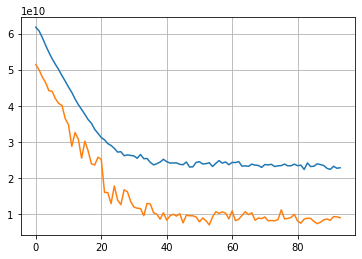

In [146]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [147]:
model.evaluate(X_test,y_test)

512/512 [==============================] - 0s 451us/step - loss: 6903417344.0000


6903417344.0

## Podsumowanie

Przedstawione modele są w stanie bardzo dobrze przewidzieć ilość "like" pod filmikami.